In [ ]:
#!pip install gdown
#!pip install pyunpack
#!pip install patool'''

In [ ]:
#import tensorflow as tf
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
#import gdown
#from pyunpack import Archive
import os

#link = 'https://drive.google.com/file/d/1thm5qnwzLcCHFFjaNGjh1a3lPgGvaI2f/view?usp=sharing'
#destination = 'model_birds2.h5'
#ddestPath = 'CUB_200_2011'
#gdown.download(url=link, output=destination, quiet=False, fuzzy=True)
#os.mkdir(ddestPath)
#Archive('/kaggle/input/cub200/CUB_200_2011.tgz').extractall('.')

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as display
from PIL import Image
import cv2
import pandas as pd

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

---
# EDA

In [ ]:

p = '/kaggle/input/cub2002011/CUB_200_2011/images/'
cl = os.listdir(p)
print('class number: ',len(cl))

In [ ]:
cont = 0
l1,l2,l3,l4 = [],[],[],[]
for k in cl:
  if cont < 50: l1.append(k)
  elif cont <100: l2.append(k)
  elif cont <150: l3.append(k)
  else: l4.append(k)
  cont += 1

clSize1,clSize2,clSize3,clSize4 = {},{},{},{}

for a,s,d,f in zip(l1,l2,l3,l4):
  clSize2[s[:3]] = len(os.listdir(p+s+'/'))
  clSize3[d[:3]] = len(os.listdir(p+d+'/'))
  clSize1[a[:3]] = len(os.listdir(p+a+'/'))
  clSize4[f[:3]] = len(os.listdir(p+f+'/'))
len(clSize1)

In [ ]:
#os.listdir(p+l1[1]+'/')

In [ ]:
'''plt.figure(figsize = (10, 5))
plt.title("Number of Images by Class")
plt.xticks(rotation ='vertical')
plt.bar(*zip(*clSize1.items()))'''

In [ ]:
'''plt.figure(figsize = (10, 5))
plt.title("Number of Images by Class")
plt.xticks(rotation ='vertical')
plt.bar(*zip(*clSize2.items()))'''

In [ ]:
'''plt.figure(figsize = (10, 5))
plt.title("Number of Images by Class")
plt.xticks(rotation ='vertical')
plt.bar(*zip(*clSize3.items()))'''

In [ ]:
'''plt.figure(figsize = (10, 5))
plt.title("Number of Images by Class")
plt.xticks(rotation ='vertical')
plt.bar(*zip(*clSize4.items()))'''

In [ ]:
rng = np.random.default_rng()
r1 = rng.choice(200, size=25, replace=False)
r2 = rng.choice(30, size=25, replace=False)
imgLst = []
for i in range(len(r1)):
  #print(clNum, imgNum)
    img = os.listdir(p+cl[r1[i]]+'/')
    imgLst.append(p+cl[r1[i]]+'/'+img[r2[i]])
  #imgLst[cl[r1[i]][:3]] = p+cl[r1[i]]+'/'+img[r2[i]]
  #print(c,r1[i], r2[i], cl[r1[i]][:3])

#print(len(r1), r1)
#print(len(r2), r2)
#print(len(imgLst))
#imgLst

In [ ]:
def plotRandImgs():
    rng = np.random.default_rng()
    r1 = rng.choice(200, size=25, replace=False)
    r2 = rng.choice(30, size=25, replace=False)
    imgLst = []
    clImg = []
    for i in range(len(r1)):
        #print(clNum, imgNum)
        img = os.listdir(p+cl[r1[i]]+'/')
        imgLst.append(p+cl[r1[i]]+'/'+img[r2[i]])
        clImg.append(cl[r1[i]][:3])
    w = 10
    h = 10
    fig = plt.figure(figsize=(9, 13))
    columns = 5
    rows = 5

    # ax enables access to manipulate each of subplots
    ax = []

    for i in range(columns*rows):
        img = cv2.imread(imgLst[i])[...,::-1]
        # create subplot and append to ax
        ax.append(fig.add_subplot(rows, columns, i+1))
        ax[-1].set_title(clImg[i])  # set title
        plt.imshow(img)
    plt.show()

#plotRandImgs()

In [ ]:
#plotRandImgs()

While there are multiple species of birds in the dataset, many birds share a many characteristics, this is specially notable when it comes to certain bird subspecies, for example the Northern Waterthrush is very similar to the Louisiana Waterthrush. For this reason, it has been decided to use only one bird species per family.<br>

---


Northern Waterthrush:<br>
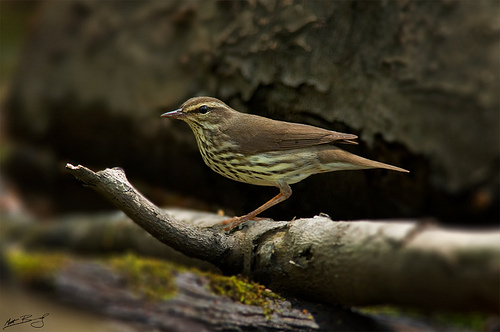
<br>
Louisiana Waterthrush:<br>
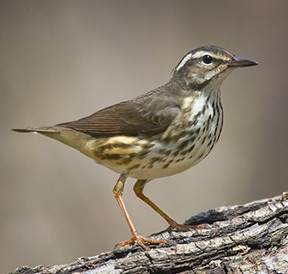

In [ ]:
famSet = set()
noFam = []
for i in cl:
    if '_' in i:
        famSet.add(i.split('_')[-1])
    else: noFam.append(i)
len(famSet)

In [ ]:
os.mkdir('BirdFamilies')

In [ ]:
for i in famSet:
    l=[]
    tem = []
    for k in cl:
        if i in k:
            tem.append(k)
    
    if len(tem) == 1:
        noFam.extend(tem)
    #print('tem: ',tem)
        continue
    l.extend(tem)
    imgLst = [p+sp+'/'+os.listdir(p+sp+'/')[0] for sp in l]
    spLst = [sp for sp in l]

    w = 10
    h = 10
    fig = plt.figure(figsize=(15, 15))
  #plt.title(i)
    columns = 1
    rows = len(l)
  #print(len(l))
    cont = 0
    ax = []
    for k in range(1, columns*rows +1):
      #print(imgLst[cont], k)
        img = cv2.imread(imgLst[cont])[...,::-1]
        ax.append(fig.add_subplot(rows, columns, k))
        ax[-1].set_title(spLst[cont])
        plt.imshow(img)

        cont+=1
        plt.show()

        plt.savefig('BirdFamilies/'+i+'.png')


In [ ]:
# The selected classes are the following
Selected_Classes =['007','012','016','018','024','026','029','031','035','042',
                   '047','053','055','059','068','071','073','077','083','090','095',
                   '101','108','112','117','138','140','143','150','148','151','178',
                   '184','185','191','193']

In [ ]:
len(Selected_Classes)

In [ ]:
len(noFam)

In [ ]:
for i in Selected_Classes:
    for k in cl:
        if i in k[:3]:
            noFam.append(k)

Selected 70 bird species.

In [ ]:
len(noFam)

---
# Preprocessing

In [ ]:
import shutil
#shutil.rmtree('finalDataset')
os.mkdir('finalDataset')
datasetPath = ''

In [ ]:
'''from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers'''

In [ ]:

for i in noFam:
    spath = os.path.join(p, i)
    dest_dir = 'finalDataset'
    dest_dir = os.path.join(dest_dir,i)
    os.mkdir(dest_dir)
    for k in os.listdir(spath):
        shutil.copy2(os.path.join(spath,k), dest_dir)


In [ ]:
len(noFam)

In [ ]:

import pandas as pd


---
# Training

In [ ]:
img_height,img_width = 150, 150
batch_size = 20

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds


In [ ]:
directory = '/kaggle/working/finalDataset/'
trainds, valds = tf.keras.utils.image_dataset_from_directory(directory,                  
    batch_size=25,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='both')
class_names = trainds.class_names

In [ ]:
class_names = trainds.class_names

In [ ]:
len(class_names)

## 1st Iteration

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16

In [ ]:
model = models.Sequential()

conv_base = VGG16(weights='imagenet',
								include_top = False,
								input_shape = (150,150,3))

model.add(conv_base)
conv_base.trainable = False
#model.add(layers.Conv2D(16, kernel_size=3, padding='same', strides = 3, activation="relu", input_shape=(150,150,3)))
#model.add(layers.MaxPooling2D((3,3)))
#model.add(layers.Conv2D(16, kernel_size=4, padding='same', strides = 2, activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((3,3)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(69,activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
						optimizer=keras.optimizers.Adam(learning_rate=.005),
						metrics=['acc'])

In [ ]:
history = model.fit(trainds,
				#steps_per_epoch = 75,
				epochs = 50,
				validation_data = val_generator,
				validation_steps = 25)

model.save('model_birds.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [ ]:
df = pd.DataFrame(history.history)
df

In [ ]:
y_pred =  model.predict(valds)

In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in valds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

In [ ]:
yTrue = []
YPred = []
for i in correct_labels:
    yTrue.append(class_names[i])
for i in predicted_labels:
    YPred.append(class_names[i])

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
print("Overall Accuracy:",accuracy_score(yTrue, YPred))
print("Overall Precision:",precision_score(yTrue, YPred, average='macro'))
print("Overall Recall:",recall_score(yTrue, YPred, average='macro'))

In [ ]:
#plt.figure(figsize=(10,6))
cm = confusion_matrix(correct_labels, predicted_labels)
fig = plt.figure(figsize = (40,40))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.2) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples');
ax1.set_ylabel('True Values',fontsize=12)
ax1.set_xlabel('Predicted Values',fontsize=12)
plt.show()

## 2nd Iteration

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in trainds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
size = (224, 224)
IMG_SIZE = 224
trainds = trainds.map(lambda x, y: (tf.image.resize(x, size), y))
valds = valds.map(lambda x, y: (tf.image.resize(x, size), y))

In [ ]:
#size = (150, 150)
data_augmentation = keras.Sequential(
    [ 
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.3),
    ]
)
units =len(class_names)

## Xception

In [ ]:
DNet = keras.applications.Xception(weights='imagenet',
								include_top = False,
								input_shape = (224,224,3))
DNet.trainable = False
DNet._name = 'DNet'

In [ ]:
MNet = keras.applications.Xception(weights='imagenet',
								include_top = False,
								input_shape = (224,224,3))
MNet.trainable = False
MNet._name = 'MNet'

In [ ]:


def outer_product(x):
    outer product
    op = tf.einsum('ijkm,ijkn->imn',x[0],x[1])
    #phi_I = tf.tensordot(x[0],x[1], axes=0)
    
    # Reshape from [batch_size,depth,depth] to [batch_size, depth*depth]
    op = tf.reshape(op,[-1,x[0].shape[3]*x[1].shape[3]])
    
    # Divide by feature map size [sizexsize]
    size1 = int(x[1].shape[1])
    size2 = int(x[1].shape[2])
    op = tf.divide(op, size1*size2)
    
    # Take signed square root of phi_I
    y_ssqrt = tf.multiply(tf.sign(op),tf.sqrt(tf.abs(op)+1e-12))
    
    # Apply l2 normalization
    z_l2 = tf.nn.l2_normalize(y_ssqrt, axis=1)
    return z_l2



In [ ]:
inputs = keras.Input(shape=(224, 224, 3),dtype='float32')
BCNN = data_augmentation(inputs)
scale_layer = keras.layers.Rescaling(scale=1 / 155, offset=-1)
x = scale_layer(BCNN)

#x = MNet(x, training=False)

CNNA = DNet(x, training=False)
CNNB = MNet(x, training=False)

#CNNA = CNNA[:,:-1,:-1,:]
bilinear = keras.layers.Lambda(outer_product, name='outer_product1')([CNNA,CNNB])


# Flatten
op = keras.layers.Flatten(name='flatten')(bilinear)#fl

# Softmax
outputs = keras.layers.Dense(units,name='softmax',activation='softmax')(op)

model2 = keras.Model(inputs, outputs)

model2.summary()

model2.compile(loss='sparse_categorical_crossentropy',
						optimizer=keras.optimizers.Adam(learning_rate=.03),
						metrics=['acc'])

In [ ]:
keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
history = model2.fit(trainds,
				#steps_per_epoch = 75,
				epochs = 70,
				validation_data = valds,
				validation_steps = 10)



In [ ]:
model2.save('xception.h5')

In [ ]:

frame = pd.DataFrame(history.history)
frame

In [ ]:
acc = frame['acc']
val_acc = frame['val_acc']
loss = frame['loss']
val_loss = frame['val_loss']

epochs = range(1, len(acc)+1)

#acc_plot = frame.plot(y="val_loss", title = "Loss vs Epochs",legend=False)
#acc_plot.set(xlabel="Epochs", ylabel="Loss")

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [ ]:
acc_plot = frame.plot(y="acc", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

In [ ]:
#from google.colab import files
#files.download("model_birds.h5")

In [ ]:
df = pd.DataFrame(history.history)
df

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
def selectRandomPredictions():
    d = '/kaggle/working/finalDataset/'
    clList = os.listdir(d)
    #print(len(clList))
    rng = np.random.default_rng()
    r1 = rng.choice(68, size=10, replace=False)
    r2 = rng.choice(30, size=10, replace=False)
    imgList = []
    ImgLabel = []
    for i in range(len(r1)):
        #print(clNum, imgNum)
        img = os.listdir(d+clList[r1[i]]+'/')
        imgList.append(d+clList[r1[i]]+'/'+img[r2[i]])
        ImgLabel.append(int(clList[r1[i]][:3]))
    #print(len(imgLst), len(clImg))
    return imgList, ImgLabel

In [ ]:
def predictImgs(i):
    img = image.load_img(i,  target_size=(224,224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis = 0)
    img_tensor /= 255.
    confidence = model2.predict(img_tensor)
    print(i, img)
    #print(confidence)
    #print(confidence[0])
    print('max value ',confidence[0].max())
    print('max val pos ',confidence[0].argmax())
    #predict_class = (confidence > 0.05).astype("int32")
    #print(confidence)
    #class_names[np.argmax(predict_class)]
    print("Predicted: ", class_names[confidence[0].argmax()], "True:", j)
    predLst.append(confidence[0])
    predInd.append(confidence[0].argmax())
    plt.imshow(img_tensor[0])
    plt.show()

In [ ]:
imgList, ImgLabel = selectRandomPredictions()
predLst,predInd = [],[]
for i,j in zip(imgList,ImgLabel):
    predictImgs(i)

In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in valds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model2.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

In [ ]:
yTrue = []
YPred = []
for i in correct_labels:
    yTrue.append(class_names[i])
for i in predicted_labels:
    YPred.append(class_names[i])

In [ ]:
cm = confusion_matrix(yTrue, YPred)
fig = plt.figure(figsize = (50,50))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.2) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples')#,xticklabels=class_names, yticklabels=class_names);
ax1.set_ylabel('True Values',fontsize=12)
ax1.set_xlabel('Predicted Values',fontsize=12)
plt.savefig('confM_xcep.png', dpi = 300)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(yTrue, YPred))
print("Overall Precision:",precision_score(yTrue, YPred, average='macro'))
print("Overall Recall:",recall_score(yTrue, YPred, average='macro'))

## VGG

In [ ]:
DNet = keras.applications.VGG16(weights='imagenet',
								include_top = False,
								input_shape = (224,224,3))
DNet.trainable = False
DNet._name = 'DNet'

MNet = keras.applications.VGG16(weights='imagenet',
								include_top = False,
								input_shape = (224,224,3))
MNet.trainable = False
MNet._name = 'MNet'

In [ ]:
inputs = keras.Input(shape=(224, 224, 3),dtype='float32')
BCNN = data_augmentation(inputs)
scale_layer = keras.layers.Rescaling(scale=1 / 155, offset=-1)
x = scale_layer(BCNN)

#x = MNet(x, training=False)

CNNA = DNet(x, training=False)
CNNB = MNet(x, training=False)

#CNNA = CNNA[:,:-1,:-1,:]
bilinear = keras.layers.Lambda(outer_product, name='outer_product1')([CNNA,CNNB])


# Flatten
op = keras.layers.Flatten(name='flatten')(bilinear)#fl

# Softmax
outputs = keras.layers.Dense(units,name='softmax',activation='softmax')(op)

modelVGG = keras.Model(inputs, outputs)

modelVGG.summary()

modelVGG.compile(loss='sparse_categorical_crossentropy',
						optimizer=keras.optimizers.Adam(learning_rate=.03),
						metrics=['acc'])

In [ ]:
history = modelVGG.fit(trainds,
				#steps_per_epoch = 75,
				epochs = 70,
				validation_data = valds,
				validation_steps = 10)

modelVGG.save('VGG.h5')

In [ ]:
frame = pd.DataFrame(history.history)
frame

In [ ]:
acc = frame['acc']
val_acc = frame['val_acc']
loss = frame['loss']
val_loss = frame['val_loss']

epochs = range(1, len(acc)+1)

#acc_plot = frame.plot(y="val_loss", title = "Loss vs Epochs",legend=False)
#acc_plot.set(xlabel="Epochs", ylabel="Loss")

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [ ]:
acc_plot = frame.plot(y="acc", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in valds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = modelVGG.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

In [ ]:
yTrue = []
YPred = []
for i in correct_labels:
    yTrue.append(class_names[i])
for i in predicted_labels:
    YPred.append(class_names[i])

In [ ]:
cm = confusion_matrix(yTrue, YPred)
fig = plt.figure(figsize = (50,50))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.2) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples')#,xticklabels=class_names, yticklabels=class_names);
ax1.set_ylabel('True Values',fontsize=12)
ax1.set_xlabel('Predicted Values',fontsize=12)
plt.savefig('confM_VGG.png', dpi = 300)
plt.show()

In [ ]:
print("Overall Accuracy:",accuracy_score(yTrue, YPred))
print("Overall Precision:",precision_score(yTrue, YPred, average='macro'))
print("Overall Recall:",recall_score(yTrue, YPred, average='macro'))

## InceptionV3

In [ ]:
DNet = keras.applications.InceptionV3(weights='imagenet',
								include_top = False,
								input_shape = (224,224,3))
DNet.trainable = False
DNet._name = 'DNet'

MNet = keras.applications.InceptionV3(weights='imagenet',
								include_top = False,
								input_shape = (224,224,3))
MNet.trainable = False
MNet._name = 'MNet'

In [ ]:
inputs = keras.Input(shape=(224, 224, 3),dtype='float32')
BCNN = data_augmentation(inputs)
scale_layer = keras.layers.Rescaling(scale=1 / 155, offset=-1)
x = scale_layer(BCNN)

#x = MNet(x, training=False)

CNNA = DNet(x, training=False)
CNNB = MNet(x, training=False)

#CNNA = CNNA[:,:-1,:-1,:]
bilinear = keras.layers.Lambda(outer_product, name='outer_product1')([CNNA,CNNB])


# Flatten
op = keras.layers.Flatten(name='flatten')(bilinear)#fl

# Softmax
outputs = keras.layers.Dense(units,name='softmax',activation='softmax')(op)

modelINC = keras.Model(inputs, outputs)

modelINC.summary()

modelINC.compile(loss='sparse_categorical_crossentropy',
						optimizer=keras.optimizers.Adam(learning_rate=.03),
						metrics=['acc'])

In [ ]:
history = modelINC.fit(trainds,
				#steps_per_epoch = 75,
				epochs = 70,
				validation_data = valds,
				validation_steps = 10)



In [ ]:
modelINC.save('Inception.h5')

In [ ]:
frame = pd.DataFrame(history.history)
frame

In [ ]:
acc = frame['acc']
val_acc = frame['val_acc']
loss = frame['loss']
val_loss = frame['val_loss']

epochs = range(1, len(acc)+1)

#acc_plot = frame.plot(y="val_loss", title = "Loss vs Epochs",legend=False)
#acc_plot.set(xlabel="Epochs", ylabel="Loss")

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [ ]:
acc_plot = frame.plot(y="acc", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in valds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = modelINC.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

In [ ]:
yTrue = []
YPred = []
for i in correct_labels:
    yTrue.append(class_names[i])
for i in predicted_labels:
    YPred.append(class_names[i])

In [ ]:
cm = confusion_matrix(yTrue, YPred)
fig = plt.figure(figsize = (50,50))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.2) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples')#,xticklabels=class_names, yticklabels=class_names);
ax1.set_ylabel('True Values',fontsize=12)
ax1.set_xlabel('Predicted Values',fontsize=12)
plt.savefig('confM_Inc.png', dpi = 300)
plt.show()

In [ ]:
print("Overall Accuracy:",accuracy_score(yTrue, YPred))
print("Overall Precision:",precision_score(yTrue, YPred, average='macro'))
print("Overall Recall:",recall_score(yTrue, YPred, average='macro'))

## Paper implementation

In [ ]:
DNet = keras.Sequential( 
    [ 
        keras.Input(shape=(224, 224, 3)),
        #BLOQUE 1
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
        keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"),
        #BLOQUE 2
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"),
        #BLOQUE 3
        keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding='same'),
        keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding='same'),
        keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"),
        #BLOQUE 4
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding='same'),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding='same'),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding='same'),
        keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"),
        #BLOQUE 5
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding='same'),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding='same'),
        keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding='same'),
        #keras.layers.MaxPooling2D(pool_size=2, strides=2, padding="same")
    ]
)

MNet = keras.Sequential(
    [
        keras.Input(shape=(224, 224, 3)),
        #BLOQUE 1
        keras.layers.Conv2D(filters=96, kernel_size=(7,7), activation="relu", padding='valid',kernel_regularizer='L1',strides=2),
        keras.layers.MaxPooling2D(pool_size=2),
        #BLOQUE 2
        keras.layers.Conv2D(filters=256, kernel_size=(5,5), activation="relu", padding='same',kernel_regularizer='L1',strides=2),
        keras.layers.MaxPooling2D(pool_size=2),
        #BLOQUE 3
        keras.layers.Conv2D(filters=512, kernel_size=(5,5), activation="relu", padding='same',strides=1),
        #BLOQUE 4
        keras.layers.Conv2D(filters=512, kernel_size=(5,5), activation="relu", padding='same',strides=1),
        #BLOQUE 5
        keras.layers.Conv2D(filters=512, kernel_size=(5,5), activation="relu", padding='same',strides=1),
        #keras.layers.MaxPooling2D(pool_size=3)
    ]
)

In [ ]:
inputs = keras.Input(shape=(224, 224, 3),dtype='float32')
BCNN = data_augmentation(inputs)
scale_layer = keras.layers.Rescaling(scale=1 / 155, offset=-1)
x = scale_layer(BCNN)

#x = MNet(x, training=False)

CNNA = DNet(x, training=False)
CNNB = MNet(x, training=False)

CNNA = CNNA[:,:-1,:-1,:]
bilinear = keras.layers.Lambda(outer_product, name='outer_product1')([CNNA,CNNB])


# Flatten
op = keras.layers.Flatten(name='flatten')(bilinear)#fl

# Softmax
outputs = keras.layers.Dense(units,name='softmax',activation='softmax')(op)

modelCN = keras.Model(inputs, outputs)

modelCN.summary()

modelCN.compile(loss='sparse_categorical_crossentropy',
						optimizer=keras.optimizers.Adam(learning_rate=.003),
						metrics=['acc'])

In [ ]:
history = modelCN.fit(trainds,
				#steps_per_epoch = 75,
				epochs = 70,
				validation_data = valds,
				validation_steps = 10)

modelCN.save('BCNN.h5')

In [ ]:
frame = pd.DataFrame(history.history)
frame

In [ ]:
acc = frame['acc']
val_acc = frame['val_acc']
loss = frame['loss']
val_loss = frame['val_loss']

epochs = range(1, len(acc)+1)

#acc_plot = frame.plot(y="val_loss", title = "Loss vs Epochs",legend=False)
#acc_plot.set(xlabel="Epochs", ylabel="Loss")

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [ ]:
acc_plot = frame.plot(y="acc", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in valds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = modelCN.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

In [ ]:
yTrue = []
YPred = []
for i in correct_labels:
    yTrue.append(class_names[i])
for i in predicted_labels:
    YPred.append(class_names[i])

In [ ]:
cm = confusion_matrix(yTrue, YPred)
fig = plt.figure(figsize = (50,50))
ax1 = fig.add_subplot(1,1,1)
sns.set(font_scale=1.2) #for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12},
     cbar = False, cmap='Purples')#,xticklabels=class_names, yticklabels=class_names);
ax1.set_ylabel('True Values',fontsize=12)
ax1.set_xlabel('Predicted Values',fontsize=12)
plt.savefig('confM_BCNN.png', dpi = 300)
plt.show()

In [ ]:
print("Overall Accuracy:",accuracy_score(yTrue, YPred))
print("Overall Precision:",precision_score(yTrue, YPred, average='macro'))
print("Overall Recall:",recall_score(yTrue, YPred, average='macro'))

---
# Prediction


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np
#load saved model
imgList, ImgLabel = selectRandomPredictions()

model = load_model('xception.h5')
img_path = imgList[0]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
labels = [  1,   4,   7,  12,  13,  16,  17,  18,  20,  22,  24,  26,  28,
        29,  31,  35,  36,  42,  44,  45,  46,  47,  49,  53,  55,  58,
        59,  68,  70,  71,  73,  76,  77,  83,  84,  85,  86,  87,  88,
        90,  91,  92,  93,  94,  95,  99, 101, 102, 103, 104, 105, 106,
       108, 109, 110, 112, 117, 134, 138, 140, 143, 148, 150, 151, 178,
       184, 185, 191, 193, 200]
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
print(labels[pred[0]])
preds

In [ ]:
def selectRandomPredictions():
    d = 'finalDataset/'
    clList = os.listdir(d)
    #print(len(clList))
    rng = np.random.default_rng()
    r1 = rng.choice(70, size=5, replace=False)
    r2 = rng.choice(30, size=5, replace=False)
    imgList = []
    ImgLabel = []
    for i in range(len(r1)):
        #print(clNum, imgNum)
        img = os.listdir(d+clList[r1[i]]+'/')
        imgList.append(d+clList[r1[i]]+'/'+img[r2[i]])
        ImgLabel.append(int(clList[r1[i]][:3]))
    #print(len(imgLst), len(clImg))
    return imgList, ImgLabel

In [ ]:
imgList, ImgLabel = selectRandomPredictions()
predLst,predInd = [],[]
for i,j in zip(imgList,ImgLabel):
    predictImgs(i)
